# Mineria de Palabras 

haremos un ejercicio de mineria de palabras en cada uno de los documentos de planes de gobierno de los candidatos a fin de identificar el uso de palabra de interes comun en cada texto.

In [220]:
import spacy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from spacy.matcher import Matcher

nlp = spacy.load('es_core_news_lg')

purple_colors = ["#480ca8", "#7209b7", "#b5179e", "#f72585"]

In [221]:
def leer_texto(path_archivo):
    
    """obtiene un string con el texto completro de un archivo

    Returns:
        _string_: 
        string: texto de un archivos
    """

    text = ''
    
    archivo = open(path_archivo, 'r', encoding='utf8')

    while(True):
        linea = archivo.readline()
        text = text+linea
        if not linea:
            break
    
    archivo.close
    
    return text

In [222]:
petro_txt = leer_texto('./archivos/petro_clean.pdf.txt')
fajardo_txt = leer_texto('./archivos/fajardo_clean.pdf.txt')
rodolfo_txt = leer_texto('./archivos/rodolfo_clean.pdf.txt')
federico_txt = leer_texto('./archivos/federico_clean.pdf.txt')

#Creamos los objetos Doc de cada uno de los archivos de planes de gobierno
doc_petro = nlp(petro_txt)
doc_fajardo = nlp(fajardo_txt)
doc_rodolfo = nlp(rodolfo_txt)
doc_federico = nlp(federico_txt)

In [223]:
mth_petro = Matcher(doc_petro.vocab)
mth_fajardo = Matcher(doc_fajardo.vocab)
mth_rodolfo = Matcher(doc_rodolfo.vocab)
mth_federico = Matcher(doc_federico.vocab)

## Definición de patrones de búsqueda

In [224]:
word = 'climático'

search = [{'TEXT':word}]

mth_petro.add('search', [search])
mth_fajardo.add('search', [search])
mth_rodolfo.add('search', [search])
mth_federico.add('search', [search])

#Ahora buscamos las coincidencias dentro de cada documento

matches_petro = mth_petro(doc_petro)
matches_fajardo = mth_fajardo(doc_fajardo)
matches_rodolfo = mth_rodolfo(doc_rodolfo)
matches_federico = mth_federico(doc_federico)

In [225]:
#Resultados de coincidencia para petro

lista_words_petro= []
lista_words_fajardo = []
lista_words_rodolfo = []
lista_words_federico = []

for match_id, start, end in matches_petro:
    string_id = doc_petro.vocab.strings[match_id]
    if string_id=='search':
        span = doc_petro[start-5:end+5]
        lista_words_petro.append(span.text)
    
for match_id, start, end in matches_fajardo:
    string_id = doc_fajardo.vocab.strings[match_id]
    if string_id =='search':
        span = doc_fajardo[start-5:end+5]
        lista_words_fajardo.append(span.text)
    
for match_id, start, end in matches_rodolfo:
    string_id = doc_rodolfo.vocab.strings[match_id]
    if string_id == 'search':
        span = doc_rodolfo[start-5:end+5]
        lista_words_rodolfo.append(span.text)
    
for match_id, start, end in matches_federico:
    string_id = doc_federico.vocab.strings[match_id]
    if string_id=='search':
        span = doc_federico[start-5:end+5]
        lista_words_federico.append(span.text)

In [226]:
dic_words = {}

dic_words = {
    'candidatos': ['Petro', 'Fajardo', 'Rodolfo', 'Federico'],
    'Freq':[len(lista_words_petro), len(lista_words_fajardo), len(lista_words_rodolfo), len(lista_words_federico)]
}

df_words = pd.DataFrame.from_dict(dic_words)

In [227]:
df_words

,candidatos,Freq
0,Petro,28
1,Fajardo,11
2,Rodolfo,5
3,Federico,5


<AxesSubplot:title={'center':'Frecuencia uso palabra climático por plan de gobierno'}, xlabel='candidatos', ylabel='Frecuencia'>

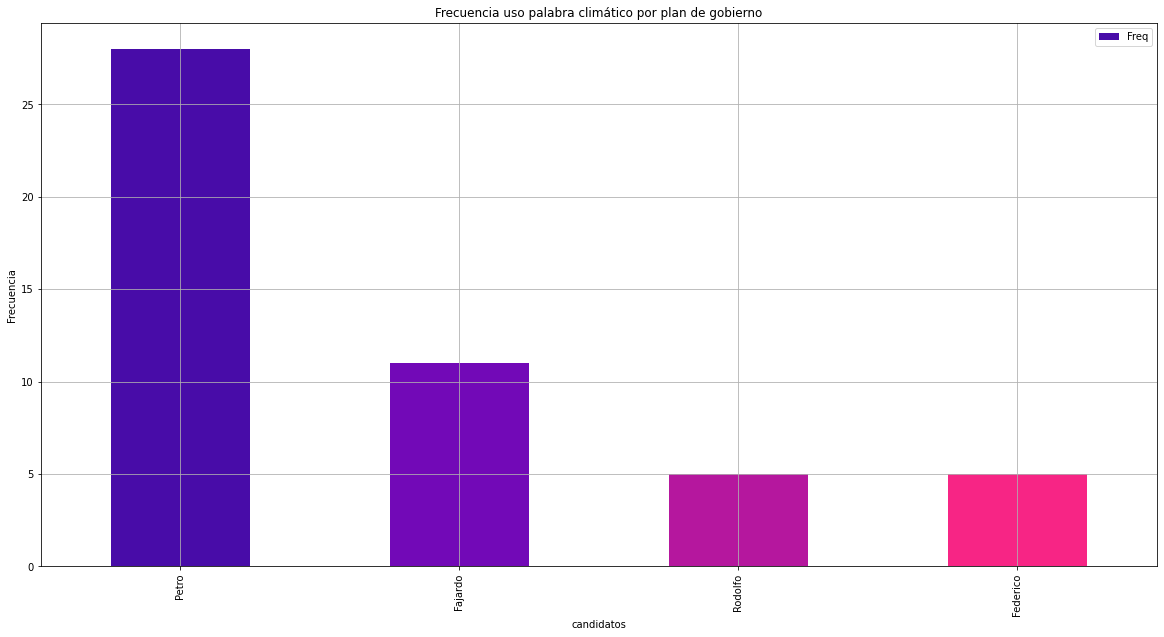

In [228]:
df_words.sort_values(by='Freq', ascending=False).plot.bar(x='candidatos',
                                                          y='Freq',
                                                          figsize = (20,10),
                                                          title="Frecuencia uso palabra "+word+" por plan de gobierno",
                                                          color=purple_colors,
                                                          grid = True,
                                                          legend = True,
                                                          ylabel = "Frecuencia")


In [229]:
lista_words_petro

['la lucha contra el cambio climático  1311 ordenamiento territorial alrededor',
 'la lucha contra el cambio climático y la paz  475',
 'lucha contra el cam bio climático en la promoción de la',
 ' crisis ambiental el cambio climático los progra mas de protección',
 'ción y adaptación al cambio climático y la protección de la',
 ' por  cambio  climático  y  la  ',
 'los  efectos del cambio climático y contribuir con ello a',
 'espe cie humana el cambio climático profundiza las desigual dades compromete',
 'contra el cam bio  climático  que  incluye  ',
 'y de gestión de cambio climático mares  y  costas',
 ' al  cambio  climático  transita remos hacia una',
 'asociados  al cambio  climático  contaminando  y  ',
 'en el contexto del cambio climático y crisis de la biodiversidad',
 'ambiental de riesgos y cambio climático para que las ciudadanías  ',
 ' para enfrentar el cambio climático y fortalecer las  capacidades',
 'contra el cam bio  climático  que  incluye  ',
 'la lucha contra el